In [ ]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt


In [34]:
# Load the csv file
df = pd.read_csv("NYC TLC Trip Record.csv")

# Display the first few rows of the DataFrame
df.head()


C:\Users\User\AppData\Local\Temp\ipykernel_18700\1090809107.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NYC TLC Trip Record.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [35]:
df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

<Axes: >

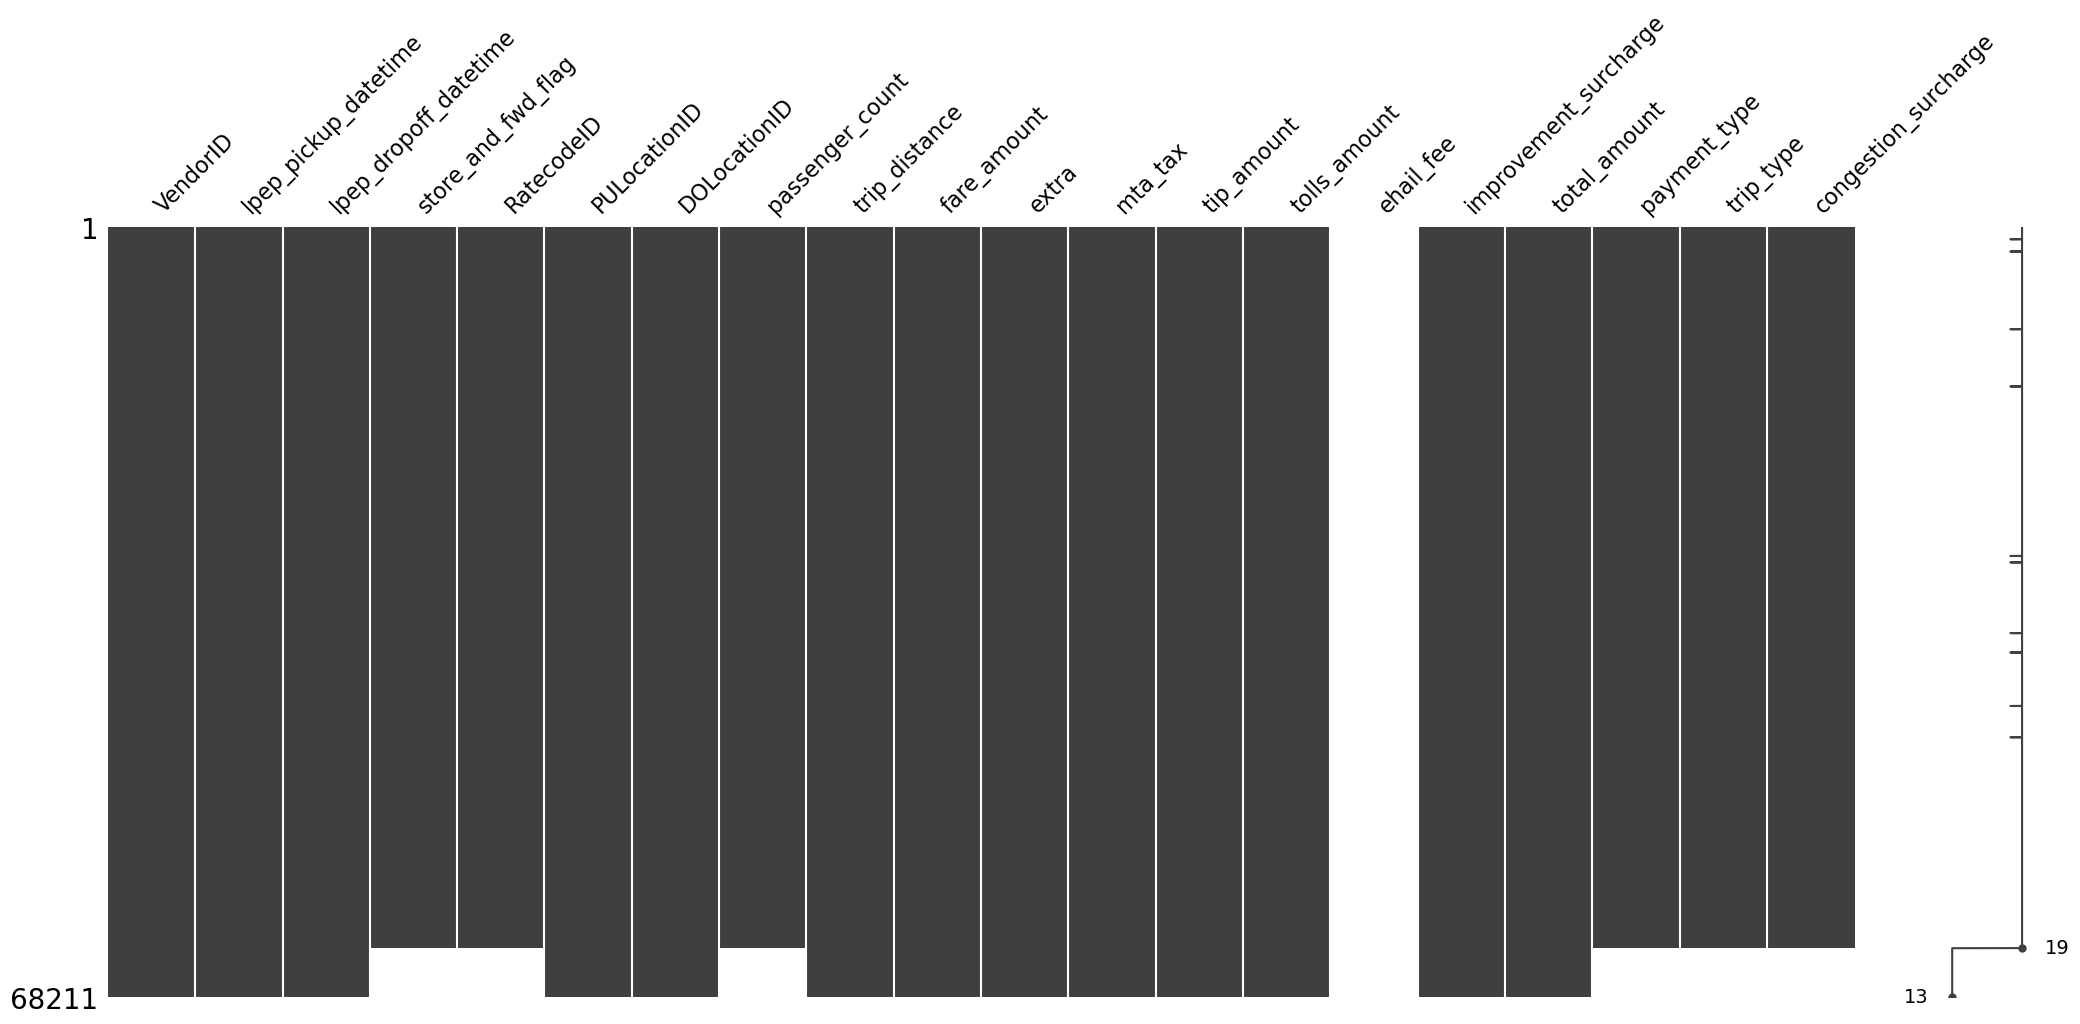

In [36]:
msno.matrix(df)

In [20]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [21]:
# Rename columns to conform to PEP8 standards
df = df.rename(columns={
    "VendorID": "vendor_id",
    "tpep_pickup_datetime": "pickup_datetime",
    "tpep_dropoff_datetime": "dropoff_datetime",
    "passenger_count": "passenger_count",
    "trip_distance": "trip_distance",
    "RatecodeID": "rate_code_id",
    "store_and_fwd_flag": "store_and_fwd_flag",
    "PULocationID": "pickup_location_id",
    "DOLocationID": "dropoff_location_id",
    "payment_type": "payment_type",
    "fare_amount": "fare_amount",
    "extra": "extra",
    "mta_tax": "mta_tax",
    "tip_amount": "tip_amount",
    "tolls_amount": "tolls_amount",
    "improvement_surcharge": "improvement_surcharge",
    "total_amount": "total_amount",
    "congestion_surcharge": "congestion_surcharge",
    "Trip_type": "trip_type"
})


In [22]:
# Display summary statistics
df.describe()

,vendor_id,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


In [23]:
# Check for duplicate rows
df.duplicated().sum()

0

In [24]:
# Fill NA rows with any missing values
df = df.fillna(0)

In [25]:
df = df.drop(columns="ehail_fee")

In [26]:
# Convert datetime columns to datetime type
df["lpep_pickup_datetime"] = pd.to_datetime(df["lpep_pickup_datetime"])
df["lpep_dropoff_datetime"] = pd.to_datetime(df["lpep_dropoff_datetime"])

In [27]:
# Convert categorical columns to category type
df["vendor_id"] = df["vendor_id"].astype("category")
df["rate_code_id"] = df["rate_code_id"].astype("category")
df["payment_type"] = df["payment_type"].astype("category")
df["trip_type"] = df["trip_type"].astype("category")


In [28]:
# Calculate trip duration in minutes
df["trip_duration"] = (df["lpep_dropoff_datetime"] - df["lpep_pickup_datetime"]).dt.total_seconds() / 60

In [29]:
# Extract hour, day of week, and month from pickup datetime
df["pickup_hour"] = df["lpep_pickup_datetime"].dt.hour
df["pickup_day_of_week"] = df["lpep_pickup_datetime"].dt.dayofweek
df["pickup_month"] = df["lpep_pickup_datetime"].dt.month

In [30]:
# Map VendorID to vendor_name
vendor_mapping = {
    1: "Creative Mobile Technologies, LLC.",
    2: "VeriFone Inc."
}
df["vendor_name"] = df["vendor_id"].map(vendor_mapping)

# Map RatecodeID to rate_code_id
rate_code_mapping = {
    1: "Standard Rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau or Westchester",
    5: "Negotiated Fare",
    6: "Group Ride",
    0: "Unknown",
    99: "Unknown"
}
df["rate_code_name"] = df["rate_code_id"].map(rate_code_mapping)

# Map store_and_fwd_flag to store_and_fwd_flag
store_and_fwd_mapping = {
    "Y": "Store and Forward Trip",
    "N": "Not A Store and Forward Trip",
    0 : "Unknown"
}
df["store_and_fwd_flag_name"] = df["store_and_fwd_flag"].map(store_and_fwd_mapping)

# Map Payment_type to payment_type
payment_type_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip",
    0: "Unkown"
}
df["payment_type_name"] = df["payment_type"].map(payment_type_mapping)

# Map Trip_type to trip_type
trip_type_mapping = {
    1: "Street-hail",
    2: "Dispatch",
    0: "Unknown"
}
df["trip_type_name"] = df["trip_type"].map(trip_type_mapping)

In [31]:
df.to_csv("NYC TLC Trip Record - Clean.csv", index=False)